In [19]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install torch torchvision torchaudio
!pip install imbalanced-learn

In [20]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Load 2023 Dataset

In [21]:
base_path = './'
data_path = os.path.join(base_path, 'creditcard_2023.csv')
data_df = pd.read_csv(data_path)
data_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Plot Features

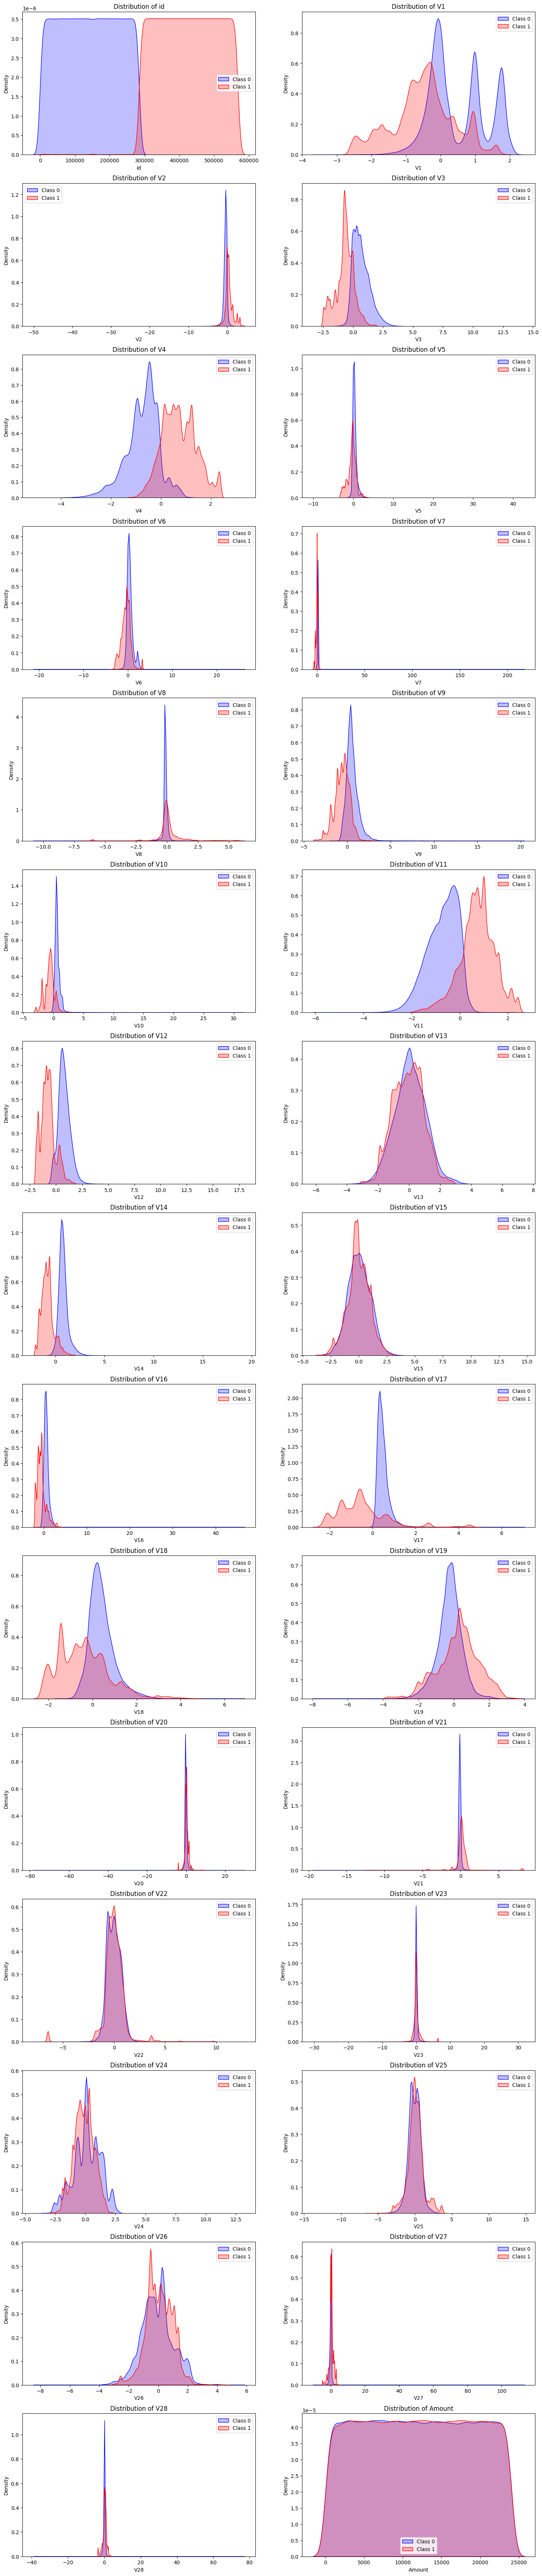

In [22]:
def plot_data(data_df):
    # Plot each feature with respect to its class
    class_0 = data_df[data_df['Class'] == 0]
    class_1 = data_df[data_df['Class'] == 1]

    # feature Columns
    features = [col for col in data_df.columns if col not in ['Class']]

    # 3 plots per row
    num_cols = 2
    num_rows = (len(features) + num_cols - 1) // num_cols

    # Plot
    plt.figure(figsize=(18, 6 * num_rows))
    for idx, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, idx + 1)
        sns.kdeplot(class_0[feature], label='Class 0', fill=True, color='blue')
        sns.kdeplot(class_1[feature], label='Class 1', fill=True, color='red')
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Density")
        plt.legend()

plot_data(data_df)

# Data Pre-processing

## Standardization

In [23]:
# Standardization features
columns_to_exclude = ["Class"]  # exclude columns that do not want to standardize
columns_to_scale = data_df.columns.difference(columns_to_exclude)
scalar = StandardScaler()
data_scaled = scalar.fit_transform(data_df[columns_to_scale])
data_scaled_df = pd.DataFrame(data_scaled, columns=columns_to_scale)  # convert back to dataframe
data_scaled_df = pd.concat([data_scaled_df, data_df[columns_to_exclude]], axis=1)  # concat classes back to standardized data
data_scaled_df

,Amount,V1,V10,V11,V12,V13,V14,V15,V16,V17,...,V28,V3,V4,V5,V6,V7,V8,V9,id,Class
0,0.858447,-0.260648,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,...,-0.151045,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,-1.732048,0
1,-0.796369,0.985100,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,...,-0.064512,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,-1.732042,0
2,-1.377011,-0.260272,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,...,-0.244718,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,-1.732036,0
3,-0.962119,-0.152152,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,...,0.048424,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,-1.732029,0
4,0.323285,-0.206820,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,...,0.419117,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,-1.732023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-1.105231,-0.833437,-1.161847,1.430971,-1.330500,-1.580730,-1.363454,0.287766,-1.480796,-1.520928,...,0.081564,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,1.732023,1
568626,-1.067766,-0.670459,-0.210817,0.173590,-0.539948,0.738315,-0.812043,0.870447,-0.545184,-0.575991,...,1.704306,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,1.732029,1
568627,1.666401,-0.311997,-0.144495,0.477582,-0.461849,-0.606100,-0.395126,-0.040673,-0.370201,-0.729002,...,-0.268741,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,1.732036,1
568628,-0.271853,0.636871,-0.080078,-0.324934,0.335215,0.464177,-0.390369,0.893881,0.477402,0.848443,...,-0.076251,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,1.732042,1


## Drop Labels

In [24]:
data_scaled_without_labels = data_scaled_df.drop(columns=['Class'])
data_labels = data_scaled_df['Class']

## Split Train and Test Dataset For LOF and Isolation Forest

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled_without_labels, data_labels, test_size=0.2, random_state=42, stratify=data_labels)

# Helper Functions for LOF

In [26]:
def train_test_lof(X_train, X_test, y_test, n_neighbors_candidates, outlier_ratio_on_test=0.006, contamination = 0.006):
    confusion_matrices = []
    reports = []
    reports_dicts = []
    lofs = []

    for n_neighbors_candidate in n_neighbors_candidates:
        # Fit Local-Outlier-Factor Model
        lof = LocalOutlierFactor(n_neighbors=n_neighbors_candidate, contamination=contamination, novelty=True)
        # train on train dataset
        lof.fit(X_train)

        # test on test dataset
        lof_test_scores = lof.decision_function(X_test)
        # compute threshold based on pre-defined outlier_ratio_on_test
        sorted_test_scores = np.sort(lof_test_scores)
        threshold_index = int(len(sorted_test_scores) * outlier_ratio_on_test)
        threshold_score = sorted_test_scores[threshold_index]
        # 1 means fraud and 0 means not fraud
        y_pred = np.where(lof_test_scores < threshold_score, 1, 0)

        confusion_matrices.append(confusion_matrix(y_test, y_pred))
        reports.append(classification_report(y_test, y_pred))
        reports_dicts.append(classification_report(y_test, y_pred, output_dict=True))
        lofs.append(lof)

    return lofs, confusion_matrices, reports, reports_dicts


def plot_lof_evaluations(n_neighbors_candidates, reports_dicts):
    if len(reports_dicts) < 1:
        print("No enough n-neighbors candidates!")
        return
    # extract precision, recall, and f1-score from report dictionaries of label/class == 1 (is fraud)
    precision_values = []
    recall_values = []
    f1_score_values = []

    for report_dict in reports_dicts:
        precision_values.append(report_dict["1"]["precision"])
        recall_values.append(report_dict["1"]["recall"])
        f1_score_values.append(report_dict["1"]["f1-score"])

    # Set up the plot
    plt.figure(figsize=(10, 6))

    # Plot each metric (Precision, Recall, F1-score) as lines
    plt.plot(n_neighbors_candidates, precision_values, marker='o', label='Precision', linestyle='-', color='b')
    plt.plot(n_neighbors_candidates, recall_values, marker='o', label='Recall', linestyle='-', color='g')
    plt.plot(n_neighbors_candidates, f1_score_values, marker='o', label='F1-score', linestyle='-', color='r')

    # Labeling the plot
    plt.xlabel('n_neighbors', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.title('Precision, Recall, F1-score for Different n_neighbors', fontsize=14)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

# Train LOF and Find Best Parameter

In [27]:
y_train.value_counts()

Class
0    227452
1    227452
Name: count, dtype: int64

In [28]:
y_test.value_counts()

Class
1    56863
0    56863
Name: count, dtype: int64

In [34]:
# train model with different parameters then plot results
resampled_n_neighbors_candidates = [10, 20, 30, 40, 50, 80, 100]
resampled_lofs, resampled_confusion_matrices, resampled_reports, resampled_reports_dicts = train_test_lof(X_train, X_test, y_test, resampled_n_neighbors_candidates, outlier_ratio_on_test=0.45, contamination=0.5)

/Users/steven/Desktop/DS5230_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/steven/Desktop/DS5230_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/steven/Desktop/DS5230_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/steven/Desktop/DS5230_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/steven/Desktop/DS5230_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation

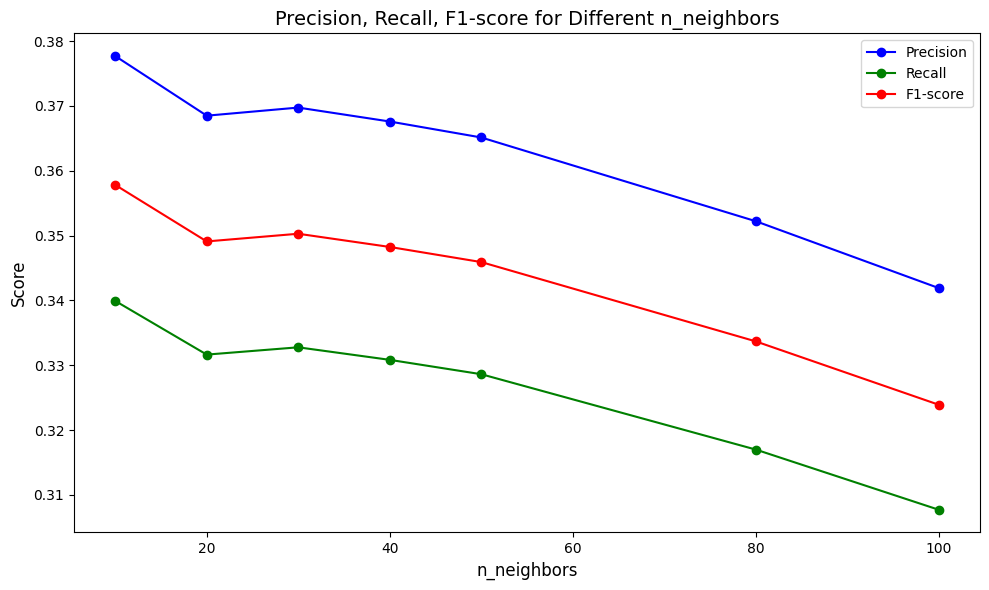

In [35]:
plot_lof_evaluations(resampled_n_neighbors_candidates, resampled_reports_dicts)

In [38]:
for i, report in enumerate(resampled_reports):
    print("n_neighbors == " + str(resampled_n_neighbors_candidates[i]))
    print(report)
    print("----------")

n_neighbors == 10
              precision    recall  f1-score   support

           0       0.40      0.44      0.42     56863
           1       0.38      0.34      0.36     56863

    accuracy                           0.39    113726
   macro avg       0.39      0.39      0.39    113726
weighted avg       0.39      0.39      0.39    113726

----------
n_neighbors == 20
              precision    recall  f1-score   support

           0       0.39      0.43      0.41     56863
           1       0.37      0.33      0.35     56863

    accuracy                           0.38    113726
   macro avg       0.38      0.38      0.38    113726
weighted avg       0.38      0.38      0.38    113726

----------
n_neighbors == 30
              precision    recall  f1-score   support

           0       0.39      0.43      0.41     56863
           1       0.37      0.33      0.35     56863

    accuracy                           0.38    113726
   macro avg       0.38      0.38      0.38    11372

In [14]:
best_lof = resampled_lofs[5]